ASSIGNMENT_ONE

# 20924722

In [1]:
import pandas as pd
import xarray as xr


In [9]:
ds = xr.open_dataset('Africa_cru_data.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [10]:
rain_ds=ds['pre']
rain_ds

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [12]:
high_precip = rain_ds.sel(lon=slice(-3.5, 1.5), lat=slice(4.5, 11.5), time=slice('1999', '2008'))
high_precip

<xarray.DataArray 'pre' (time: 120, lat: 14, lon: 10)>
[16800 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1999-01-16 1999-02-15 ... 2008-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

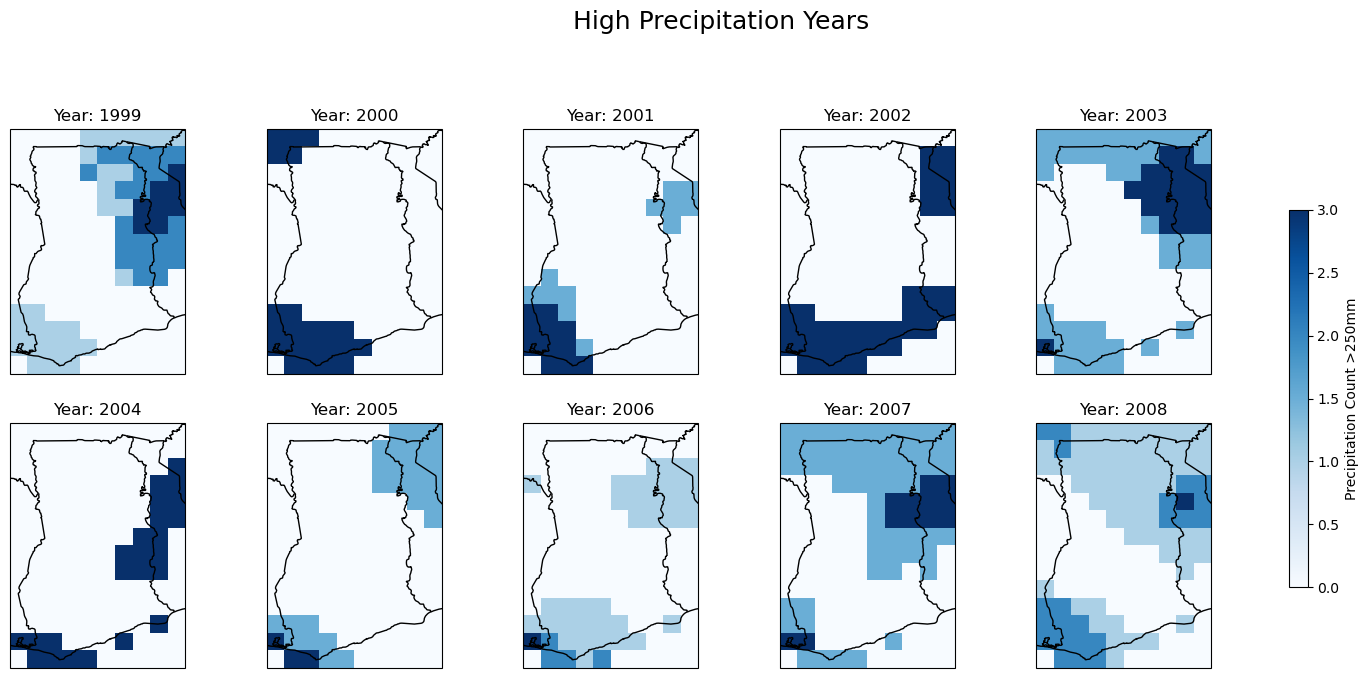

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, axes = plt.subplots(2, 5, figsize=(20, 7), sharex=True, sharey=True,
                         subplot_kw={'projection': ccrs.PlateCarree()}) 
axes = axes.flatten()  # Flatten for easy looping
for i, (year, data) in enumerate(high_precip.groupby('time.year')):
    ax = axes[i]
    rain_high = high_precip.where(data>=250).count(dim='time')  # Count occurrences >250mm
    
    rain_high.plot(ax=ax, cmap=plt.get_cmap('Blues', 256),  add_colorbar=False)

    ax.add_feature(cfeature.BORDERS, edgecolor='black')  
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')  
    ax.set_extent([-3.5, 1.5, 4.5, 11.5])  

    fig.suptitle('High Precipitation Years', fontsize=18, y=1.05)
    
    ax.set_title(f'Year: {year}')
fig.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', shrink=0.7, label="Precipitation Count >250mm")
plt.show()